In [46]:
import os
import time
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW, Adam
from GAN_models import Generator, Discriminator

In [47]:
device = 'cuda'
signal_length = 7500
gen_weights_path = "/tcmldrive/NogaK/ECG_classification/experiments/tcml_GAN_basic_attempt_3000_epochs_20230603_16_20_11/models/epoch_2999_generator_model.pth"
batch_size = 1
fixed_noise = torch.randn(batch_size, 1, signal_length, device=device)
gen = Generator(signal_length=signal_length)
gen.load_state_dict(torch.load(gen_weights_path))

<All keys matched successfully>

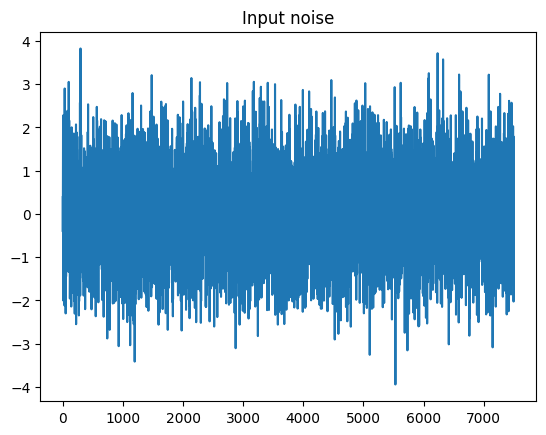

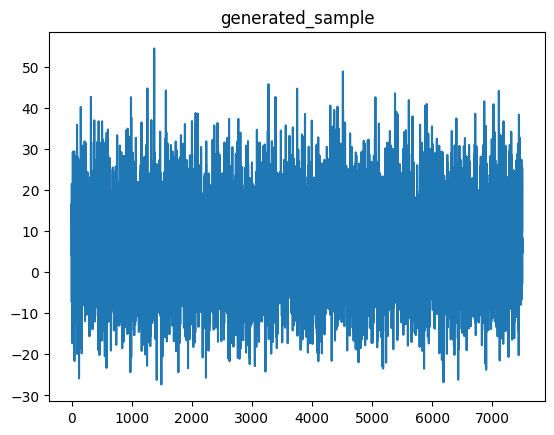

In [48]:
gen.to(device)
fake = gen(fixed_noise)

plt.figure()
plt.plot(fixed_noise.detach().cpu().squeeze(1).numpy()[:].transpose())
plt.title(f'Input noise')
# plt.savefig(os.path.join(self.results_dir,f'generated_samples_epoch_{epoch}.png'))
plt.show()
plt.close()

plt.figure()
plt.plot(fake.detach().cpu().squeeze(1).numpy()[:].transpose())
plt.title(f'generated_sample')
# plt.savefig(os.path.join(self.results_dir,f'generated_samples_epoch_{epoch}.png'))
plt.show()
plt.close()